In [1]:
%load_ext autoreload
%autoreload 2

import sys 
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

from utils.paper import mann_whitney_hyper_label_printer, survival_hyper_label_printer

In [2]:
from utils import data as data_utils
from utils.data import patient_id_to_str
from cohorts.functions import missense_snv_count
cohort = data_utils.init_cohort(normalized_per_mb=False, exclude_patient_ids=set(), only_patients_with_bams=True)
cohort_df = cohort.as_dataframe(on=missense_snv_count, join_with=['pdl1'])
cohort_df['Benefit'] = cohort_df['is_benefit']

{'dataframe_hash': 6797089423601767780,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}
inner join with pdl1: 26 to 26 rows


In [3]:
estimate_data = pd.read_csv('../estimate-output.gct',
                            skiprows=2,
                            dtype = {0: str}, 
                            sep='\t', 
                            index_col=0).drop('Description', axis=1)
estimate_data.columns = [col[1:] for col in estimate_data.columns]
estimate_data = estimate_data.T.reset_index()
estimate_data.rename(columns = {'index' : 'patient_id'}, inplace=True)
estimate_data['patient_id'] = estimate_data['patient_id'].map(patient_id_to_str)

data = estimate_data.merge(cohort_df[['patient_id', 
                                      'IC Level', 
                                      'missense_snv_count', 
                                      'benefit', 
                                      'os', 
                                      'deceased', 
                                      'pfs', 
                                      'progressed',
                                     ]])
data.sort_values('ImmuneScore')

NAME,patient_id,StromalScore,ImmuneScore,ESTIMATEScore,IC Level,missense_snv_count,benefit,os,deceased,pfs,progressed
15,5122,-627.372333,-1195.083792,-1822.456125,IC2,216,True,700,False,565,False
23,9517,-1351.956417,-1100.777575,-2452.733991,IC0,149,False,331,True,121,True
13,4072,-691.832525,-915.472805,-1607.305331,IC1,30,False,629,False,61,True
0,0040,-325.582194,-498.443472,-824.025666,IC0,540,False,24,True,20,True
24,9723,752.954563,-275.131547,477.823016,IC2,5,False,22,True,19,True
14,5037,-106.978567,-252.732791,-359.711358,IC2,601,True,610,False,561,False
21,7729,821.256094,-244.377864,576.878230,IC1,4,False,354,True,60,True
1,0471,546.001667,-206.989483,339.012184,IC0,198,False,329,True,61,True
4,1249,845.006382,-121.739941,723.266441,IC2,218,False,54,True,41,True
16,5338,1439.896415,92.901210,1532.797625,IC1,26,False,266,True,67,True


In [4]:
immune_scores = dict(
    zip(
        estimate_data.patient_id.astype(str),
        estimate_data.ImmuneScore
    )
)


stromal_scores = dict(
    zip(
        estimate_data.patient_id.astype(str),
        estimate_data.StromalScore
    )
)

def ImmuneScore(row):
    return immune_scores[row['patient_id']]

def StromalScore(row):
    return immune_scores[row['patient_id']]


# no condition 9
# with condition 17
{{{estimate_immune_score_curve_plot}}}
{{{estimate_immune_score_curve_logrank:n=26, log-rank p=0.39}}}


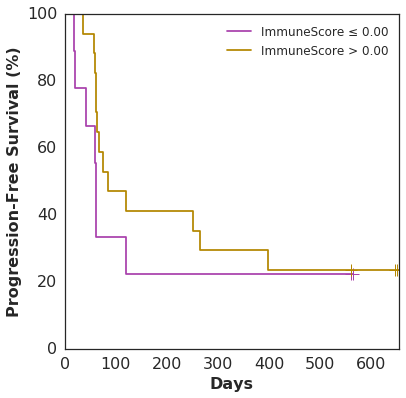

In [5]:
results = cohort.plot_survival(ImmuneScore, threshold=0, how='pfs')
survival_hyper_label_printer(results, "estimate_immune_score_curve")

Mann-Whitney test: U=95.0, p-value=0.331975467083 (two-sided)
{{{estimate_immune_score_plot}}}
{{{estimate_immune_score_benefit:764.37 (range -1195.08-1509.65)}}}
{{{estimate_immune_score_no_benefit:263.49 (range -1100.78-1734.28)}}}
{{{estimate_immune_score_mw:n=26, Mann-Whitney p=0.33}}}


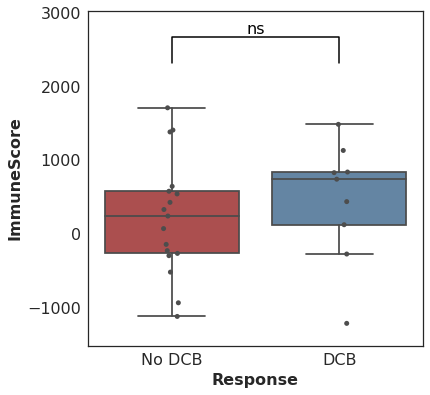

In [6]:
results = cohort.plot_benefit(ImmuneScore)
mann_whitney_hyper_label_printer(results, "estimate_immune_score")

Mann-Whitney test: U=95.0, p-value=0.331975467083 (two-sided)
{{{estimate_stromal_score_plot}}}
{{{estimate_stromal_score_benefit:764.37 (range -1195.08-1509.65)}}}
{{{estimate_stromal_score_no_benefit:263.49 (range -1100.78-1734.28)}}}
{{{estimate_stromal_score_mw:n=26, Mann-Whitney p=0.33}}}


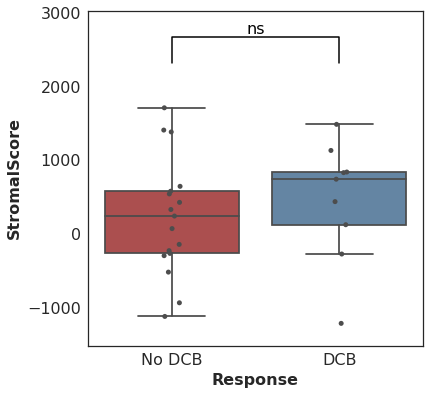

In [7]:
results = cohort.plot_benefit(StromalScore)
mann_whitney_hyper_label_printer(results, "estimate_stromal_score")

/home/tavi/miniconda2/lib/python2.7/site-packages/seaborn/categorical.py:3304: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)


{{{estimate_pdl1_plot}}}


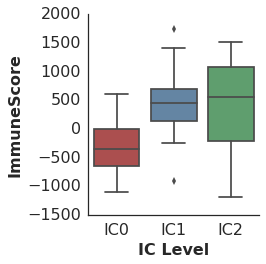

In [8]:
sb.factorplot(
    data=data,
    x='IC Level',
    y='ImmuneScore',
    kind='box',
    x_order = ['IC0', 'IC1', 'IC2']
)
print("{{{estimate_pdl1_plot}}}")

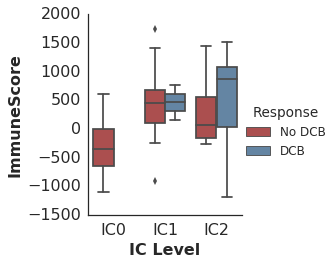

In [9]:
data['Response'] = data['benefit'].map(lambda b: cohort.benefit_plot_name if b else 'No ' + cohort.benefit_plot_name)

sb.factorplot(
    data=data,
    hue='Response',
    x='IC Level',
    y='ImmuneScore',
    kind='box',
    x_order = ['IC0', 'IC1', 'IC2']
)

In [10]:
tcr_cohort = data_utils.init_cohort(join_with=['pdl1', 'tcr_tumor', 'cibersort'], exclude_patient_ids=set(), only_patients_with_bams=True)
tcr_df = tcr_cohort.as_dataframe().merge(estimate_data)

inner join with tcr_tumor: 26 to 24 rows
inner join with pdl1: 24 to 24 rows
inner join with cibersort: 24 to 24 rows
inner join with tcr_tumor: 26 to 24 rows
inner join with pdl1: 24 to 24 rows
inner join with cibersort: 24 to 24 rows
{'dataframe_hash': -5223459372681946527,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}
inner join with tcr_tumor: 26 to 24 rows
inner join with pdl1: 24 to 24 rows
inner join with cibersort: 24 to 24 rows


In [11]:
from scipy.stats import spearmanr, pearsonr

inner join with tcr_tumor: 26 to 24 rows
inner join with pdl1: 24 to 24 rows
inner join with cibersort: 24 to 24 rows
{{{estimate_tcellfraction_plot}}}
{{{estimate_tcellfraction_spearmanr:n=24, Spearman rho=0.47 p=0.022}}}


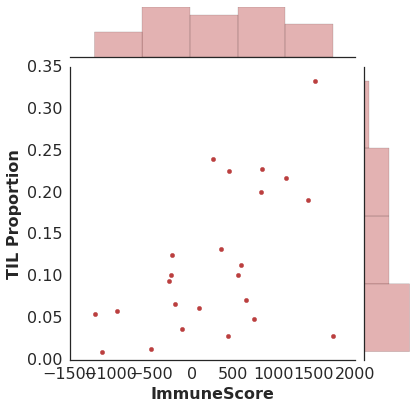

In [12]:
from utils.paper import spearmanr_hyper_label_printer
results = tcr_cohort.plot_correlation({"TIL Proportion": lambda row: 
                                                 row["T-cell fraction"],
                                    'ImmuneScore': ImmuneScore},
                                    plot_type="jointplot",
                                    x_col="ImmuneScore",
                                    show_stat_func=False,
                                    stat_func=spearmanr)

spearmanr_hyper_label_printer(results, label="estimate_tcellfraction")

(0, 1)

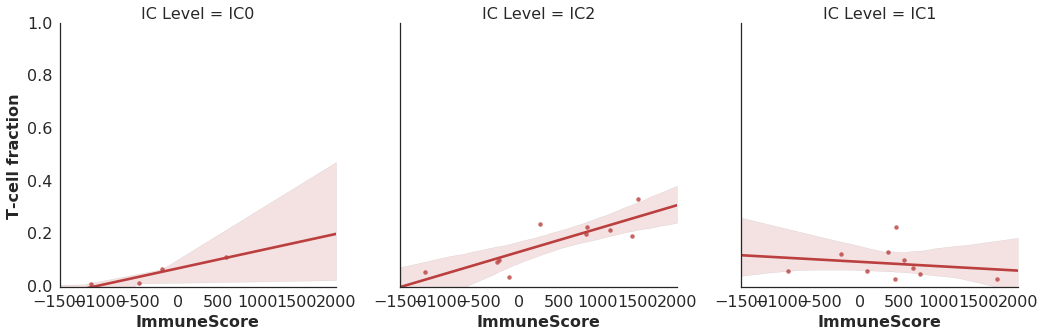

In [13]:
p = sb.lmplot(
    data = tcr_df,
    y = 'T-cell fraction',
    x = 'ImmuneScore',
    col = 'IC Level'
    
)
plt.ylim(0, 1)

(0, 1)

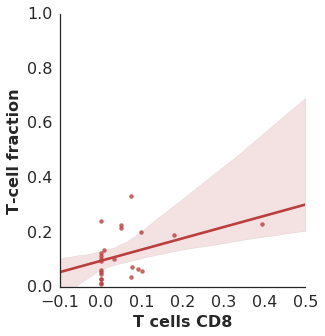

In [14]:
tcr_df['CIBERSORT Sig'] = tcr_df['P-value'] < .05
sb.lmplot(
    data = tcr_df,
    y = 'T-cell fraction',
    x = 'T cells CD8',
    
)
plt.ylim(0, 1)

In [15]:
tcell_columns = [col for col in tcr_df if col.startswith('T cells')]
tcell_cd_columns = [col for col in tcr_df if col.startswith('T cells CD')]
tcr_df['CIBERSORT T-cell fraction'] = tcr_df[tcell_columns].sum(axis=1)
tcr_df['CIBERSORT T-cell CD8/CD4 fraction'] = tcr_df[tcell_cd_columns].sum(axis=1)

(0, 1)

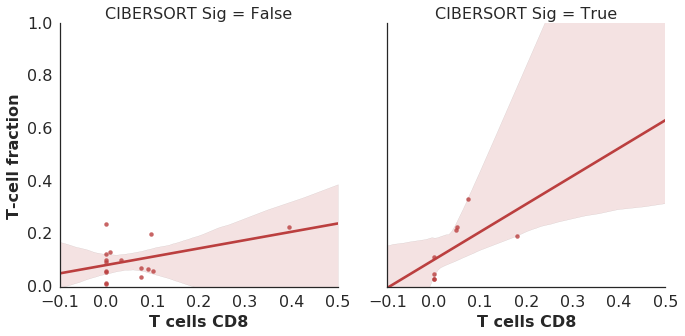

In [16]:
tcr_df['CIBERSORT Sig'] = tcr_df['P-value'] < .05
sb.lmplot(
    data = tcr_df,
    y = 'T-cell fraction',
    x = 'T cells CD8',
    col='CIBERSORT Sig'
    
)
plt.ylim(0, 1)

(0, 1)

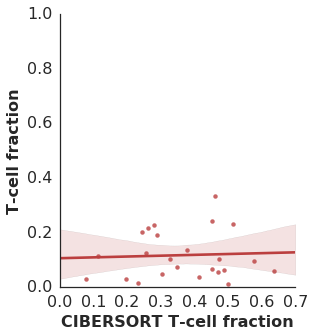

In [17]:
sb.lmplot(
    data = tcr_df,
    y = 'T-cell fraction',
    x = 'CIBERSORT T-cell fraction',
    
)
plt.ylim(0, 1)

(0, 1)

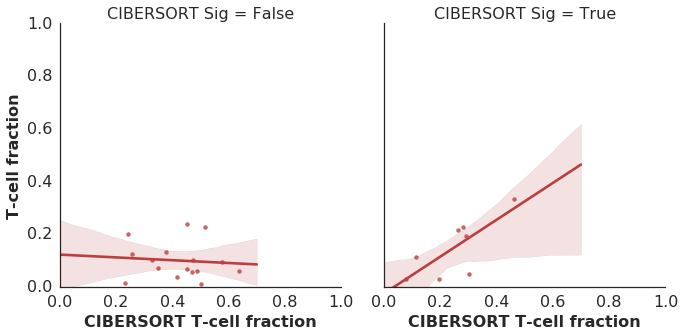

In [18]:
tcr_df['CIBERSORT Sig'] = tcr_df['P-value'] < .05
p = sb.lmplot(
    data = tcr_df,
    y = 'T-cell fraction',
    x = 'CIBERSORT T-cell fraction',
    col='CIBERSORT Sig',
    
)
sb.plt.ylim(0,1)
sb.plt.xlim(0,1)

(0, 1)

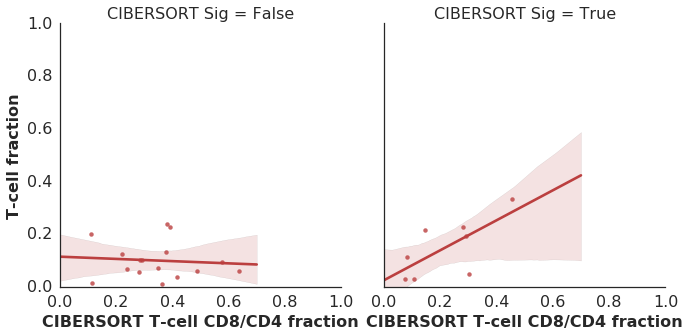

In [19]:
tcr_df['CIBERSORT Sig'] = tcr_df['P-value'] < .05
sb.lmplot(
    data = tcr_df,
    y = 'T-cell fraction',
    x = 'CIBERSORT T-cell CD8/CD4 fraction',
    col='CIBERSORT Sig'
)

sb.plt.ylim(0,1)
sb.plt.xlim(0,1)

In [20]:
cibersort = tcr_df[tcr_df['CIBERSORT Sig']]
len(cibersort)

8

In [21]:
from cohorts.survival import plot_kmf

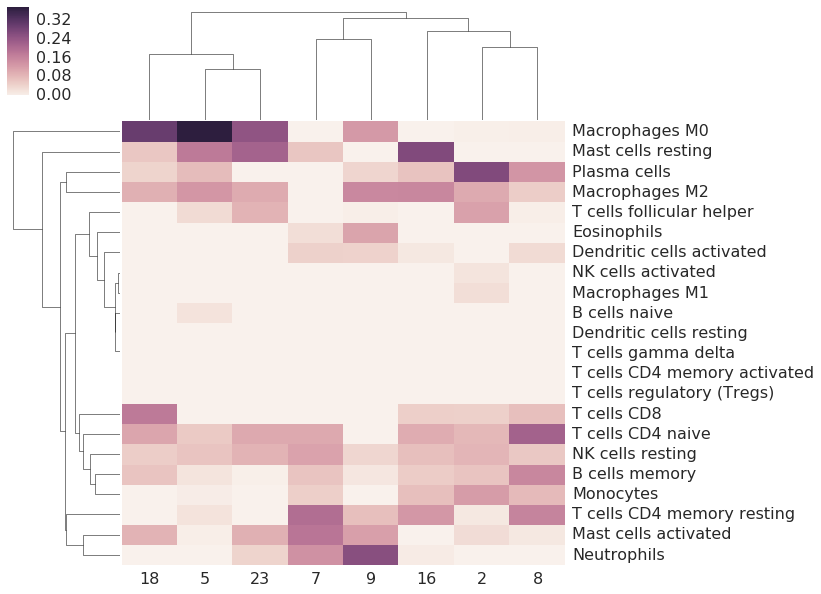

In [22]:
cibersort_columns = cibersort.columns[-34:-12]
p = sb.clustermap(cibersort[cibersort_columns].T)
r = plt.setp(p.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

# no condition 4
# with condition 4
Results
   df: 1
   alpha: 0.95
   t 0: -1
   test: logrank
   null distribution: chi squared

   __ p-value ___|__ test statistic __|____ test result ____|__ is significant __
         0.00673 |              7.344 |      Reject Null    |        True       
{{{cibersort_macrophages_pfs_plot}}}
{{{cibersort_macrophages_pfs_logrank:n=8, log-rank p=0.0067}}}


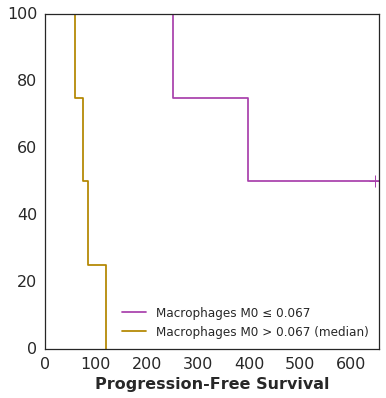

In [23]:
how = 'pfs'
results = plot_kmf(
            df=cibersort,
            condition_col='Macrophages M0',
            xlabel="Overall Survival" if how == "os" else "Progression-Free Survival",
            censor_col="deceased" if how == "os" else "progressed_or_deceased",
            survival_col=how,
            threshold='median')
results.print_summary()
survival_hyper_label_printer(results, "cibersort_macrophages_pfs")

# no condition 4
# with condition 4
{{{cibersort_macrophages_os_plot}}}
{{{cibersort_macrophages_os_logrank:n=8, log-rank p=0.0067}}}


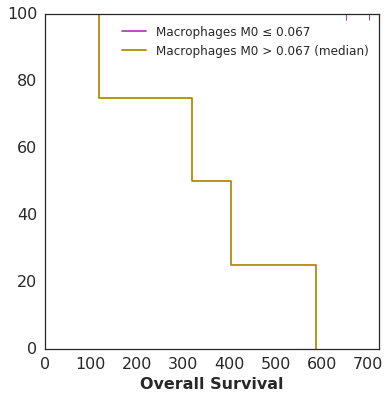

In [24]:
how = 'os'
results = plot_kmf(
            df=cibersort,
            condition_col='Macrophages M0',
            xlabel="Overall Survival" if how == "os" else "Progression-Free Survival",
            censor_col="deceased" if how == "os" else "progressed_or_deceased",
            survival_col=how,
            threshold='median')
survival_hyper_label_printer(results, "cibersort_macrophages_os")